In [1]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import fetch_mldata, fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

random_seed = 42
iris = datasets.load_iris()
X_raw = iris.data[:, 2:]
y_raw = iris.target

setosa_or_versicolor = (y_raw == 0) | (y_raw == 1)
X_raw = X_raw[setosa_or_versicolor]
y_raw = y_raw[setosa_or_versicolor]

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=random_seed)

### LinearSVC, SVC & SGDClassifier Comparison

In [2]:
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.linear_model import SGDClassifier

C = 5

linear_svc_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=C, loss="hinge", random_state=random_seed))
])

svc_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svc', SVC(kernel='linear',C=C))
])

sgd_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('sgd', SGDClassifier(loss="hinge", random_state=random_seed, eta0=0.1, max_iter=10000))
])

linear_svc_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train)
sgd_pipeline.fit(X_train, y_train)

print('Linear SVC Result: ', linear_svc_pipeline.score(X_test, y_test))
print('SVC Result: ', svc_pipeline.score(X_test, y_test))
print('SGD Classifier Result: ', sgd_pipeline.score(X_test, y_test))
linear_svc_pipeline

Linear SVC Result:  1.0
SVC Result:  1.0
SGD Classifier Result:  1.0


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

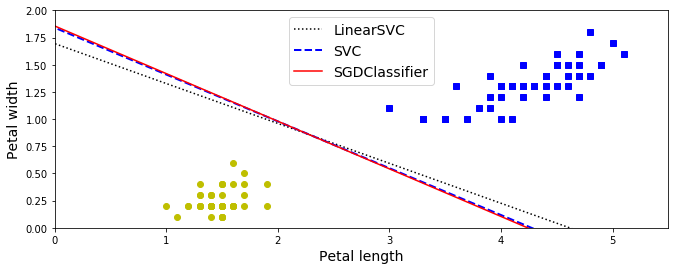

In [3]:
lin_clf = linear_svc_pipeline.named_steps['linear_svc']
svm_clf = svc_pipeline.named_steps['svc']
sgd_clf = sgd_pipeline.named_steps['sgd']
scaler = linear_svc_pipeline.named_steps['std_scaler']

w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X_raw[:, 0][y_raw==1], X_raw[:, 1][y_raw==1], "bs") # label="Iris-Versicolor"
plt.plot(X_raw[:, 0][y_raw==0], X_raw[:, 1][y_raw==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

### MNIST

In [4]:
mnist = fetch_mldata("MNIST original")
X_raw = mnist['data'].astype('float32')
y_raw = mnist['target'].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=random_seed)

In [5]:
mnist_linear_svc_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('linear_svc', SVC(random_state=random_seed, decision_function_shape="ovr"))
])
mnist_linear_svc_pipeline.fit(X_train[:10000], y_train[:10000])

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

In [6]:
y_predict = mnist_linear_svc_pipeline.predict(X_test)
accuracy_score(y_predict, y_test)

0.9408571428571428

### Housing Prediction

In [7]:
housing = fetch_california_housing()

X_raw = housing['data']
y_raw = housing['target']

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, random_state=random_seed, test_size=0.2)

In [8]:
housing_linear_svr_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svr', LinearSVR())
])
housing_svr_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svr', SVR())
])

housing_linear_svr_pipeline.fit(X_train, y_train)
housing_svr_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [9]:
y_pred = housing_svr_pipeline.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

y_pred = housing_linear_svr_pipeline.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5974893432333932
0.7620031336806842
